Support Vector Machine

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Read Data

In [27]:
import numpy as np
import pandas as pd
import math
import re

from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


df_train = pd.read_csv('data/train.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
df_train_label = df_train[["Id", "SalePrice"]]
df_train = df_train.drop('SalePrice', axis=1)

df_train = df_train.set_index("Id")
df_train_label = df_train_label.set_index("Id")

df_test = pd.read_csv('data/test.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

test_null_columns=df_test.columns[df_test.isnull().any()] 
train_null_columns=df_train.columns[df_train.isnull().any()] 
test_null_only_ColIdx = test_null_columns.difference(train_null_columns)

test_null_only_RowIdx = [ df_test[df_test[idx].isnull()].index.tolist() for idx in test_null_only_ColIdx ]
test_null_only_RowIdx = list ( set(x for l in test_null_only_RowIdx for x in l) )

problematicTestSet = df_test.loc[ df_test.index.isin( test_null_only_RowIdx ) ]

fineTestSet = df_test.loc[ ~df_test.index.isin( test_null_only_RowIdx ) ]  #1447 records

problematicTestSet= problematicTestSet.set_index("Id")
fineTestSet = fineTestSet.set_index("Id")
df_test = df_test.set_index("Id")

df = pd.concat([df_train,df_test], axis=0, sort=True)

problematicTestSet.index

Int64Index([1556, 1916, 1946, 2121, 2152, 2189, 2217, 2251, 2474, 2490, 2577, 2905], dtype='int64', name='Id')

Impute Data with preprocess.py subfunction

In [28]:
from preprocess import impute
df_label_count, encodedDic = impute( df, False) 
df_test = df_label_count[df_label_count.index >= min(df_test.index)]
df_train = df_label_count[df_label_count.index < min(df_test.index)]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bf39710>]],
      dtype=object)

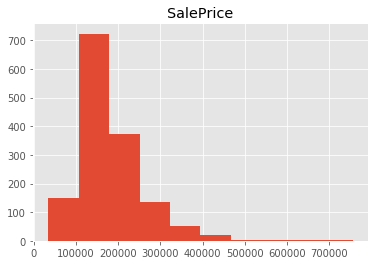

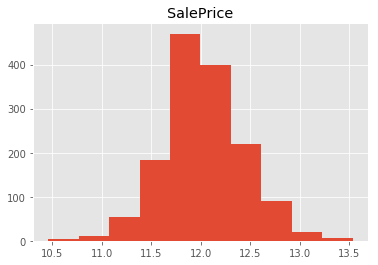

In [29]:
df_train_label = df_train_label.astype(int)
df_train_label_log = np.log( df_train_label )
df_train_label.hist()
df_train_label_log.hist()

In [30]:
numColsToKeep = ["TotalProchSF", "TotalFlrSF", "OverallQual", "CentralAir"]
df_train = df_train[numColsToKeep]
df_test = df_train[numColsToKeep]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_label_log, test_size=0.2, random_state=0)

In [32]:
def evaluate(model, test_features, test_labels): 
    
    predictions = model.predict(test_features).ravel() 
    residuals = test_labels - predictions
    rmse = np.sqrt(((test_labels - predictions) ** 2).mean())
    rmsle = np.sqrt(np.mean((np.log1p(predictions) - np.log1p(test_labels))**2))    
    pred = pd.DataFrame( {'residuals': residuals.values, 'predictions': predictions} )
    pred.set_index(residuals.index)
    
    return [rmse, rmsle, pred]

In [43]:
from sklearn.svm import SVR
from mlxtend.plotting import plot_decision_regions

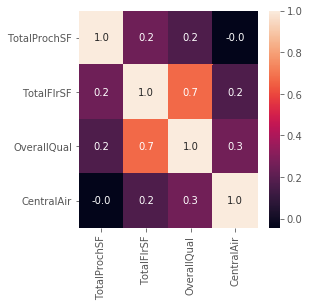

In [44]:
f = plt.subplots(figsize=(4,4))
sns.heatmap(X_train.corr(),annot=True,fmt='.1f',color='green') 

In [ ]:
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
svr_lin = SVR(kernel= 'linear', C= 1e3)
svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
svr_rbf.fit(X_train, y_train) # fitting the data points in the models
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)